# [Link](https://www.tensorflow.org/get_started/mnist/beginners)

In [1]:
import numpy as np 
import tensorflow as tf 
#import matplotlib.pyplot as plt


% matplotlib inline
plt.style.use('ggplot')

## Import MNIST Data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


* 55k data points in mnist.train
* 10k data points in mnist.test
* 5k data points in mnist.validation

In [3]:
print(mnist.train.images.shape)

(55000, 784)


## Plot an Example

LABEL:7


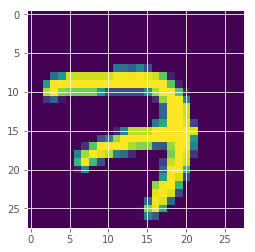

In [4]:
plt.imshow(mnist.train.images[0].reshape(28,28))
for i in range(0,9):
    if mnist.train.labels[0][i] == 1:
        print('LABEL:{}' .format(i))

## Create the Simple Model

In [7]:
input_nodes = 28*28
output_nodes = 10
learning_rate = 0.001

# Creating the graph
tf.reset_default_graph()

x = tf.placeholder(dtype=tf.float32, shape=[None, input_nodes])
y = tf.placeholder(dtype=tf.float32, shape=[None, output_nodes])

W = tf.get_variable(dtype=tf.float32,
                initializer=tf.random_normal_initializer(mean = 0, stddev=0.1),
                shape=[input_nodes, output_nodes],
                   name = 'W')

b = tf.get_variable(dtype=tf.float32,
                   initializer=tf.constant_initializer(0.0),
                    shape =[output_nodes],
                    name = 'b'
                   )

h = tf.nn.softmax(tf.matmul(x,W) + b)

# Cross Entropy 

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(h), reduction_indices=[1]))

optimiser = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)


## Main Session

In [21]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Train
batch_size = 100
epoch = 100
epoch_size = 100
n_iter = epoch * epoch_size

for iter in range(n_iter+1):
    xs, ys = mnist.train.next_batch(batch_size)
    #no batch cause GPU 
    sess.run(optimiser, feed_dict={x: xs, y: ys})
    #sess.run(optimiser, feed_dict={x: mnist.train.images, y: mnist.train.labels})
    #mini batch is faster lol
    
    if iter%epoch_size ==0:
        print("Epoch: {} Cross Entropy: {:.2f} " .format(int(iter/epoch_size),
              cross_entropy.eval(feed_dict={x:xs, y:ys}, session=sess)))




Epoch: 0 Cross Entropy: 2.66 
Epoch: 1 Cross Entropy: 2.41 
Epoch: 2 Cross Entropy: 2.44 
Epoch: 3 Cross Entropy: 2.20 
Epoch: 4 Cross Entropy: 2.13 
Epoch: 5 Cross Entropy: 2.02 
Epoch: 6 Cross Entropy: 1.95 
Epoch: 7 Cross Entropy: 1.88 
Epoch: 8 Cross Entropy: 1.75 
Epoch: 9 Cross Entropy: 1.68 
Epoch: 10 Cross Entropy: 1.62 
Epoch: 11 Cross Entropy: 1.64 
Epoch: 12 Cross Entropy: 1.57 
Epoch: 13 Cross Entropy: 1.57 
Epoch: 14 Cross Entropy: 1.44 
Epoch: 15 Cross Entropy: 1.40 
Epoch: 16 Cross Entropy: 1.41 
Epoch: 17 Cross Entropy: 1.46 
Epoch: 18 Cross Entropy: 1.38 
Epoch: 19 Cross Entropy: 1.38 
Epoch: 20 Cross Entropy: 1.28 
Epoch: 21 Cross Entropy: 1.34 
Epoch: 22 Cross Entropy: 1.29 
Epoch: 23 Cross Entropy: 1.21 
Epoch: 24 Cross Entropy: 1.24 
Epoch: 25 Cross Entropy: 1.21 
Epoch: 26 Cross Entropy: 1.09 
Epoch: 27 Cross Entropy: 1.13 
Epoch: 28 Cross Entropy: 1.11 
Epoch: 29 Cross Entropy: 1.23 
Epoch: 30 Cross Entropy: 1.06 
Epoch: 31 Cross Entropy: 0.90 
Epoch: 32 Cross En

# Accuracy

In [33]:
# Accuracy on training set 
correct_pediction = tf.equal(tf.arg_max(y,1), tf.arg_max(h,1))
accuracy = tf.reduce_mean(tf.cast(correct_pediction, tf.float32))
t_accur = sess.run(accuracy, feed_dict={x:mnist.train.images, y:mnist.train.labels})
print('Test Accuracy: {:4.2f}%' .format(100*t_accur))

Test Accuracy: 83.94%


In [34]:
v_accur = sess.run(accuracy, feed_dict={x:mnist.validation.images, y: mnist.validation.labels})
print('Valid Accuracy: {:4.2f}%' .format(100*v_accur))

Valid Accuracy: 84.54%


In [35]:
t_accur = sess.run(accuracy, feed_dict={x:mnist.test.images, y: mnist.test.labels})
print('Valid Accuracy: {:4.2f}%' .format(100*t_accur))

Valid Accuracy: 84.81%
